In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model,layers
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.optimizers import RMSprop
import cv2
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.optimizers import Adamax, Adam, RMSprop
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

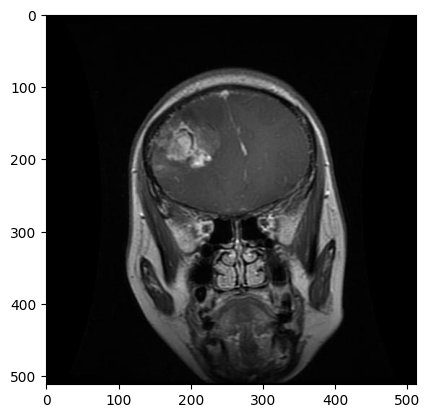

In [4]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg', cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [5]:
img.shape

(512, 512, 3)

In [6]:
data_dir = "/kaggle/input/brain-tumor-mri-dataset" 

In [7]:
def load_dataset_from_directory(data_dir, target_size=(224, 224), batch_size=32):
    train_dir = os.path.join(data_dir, '/kaggle/input/brain-tumor-mri-dataset/Training')  
    test_dir = os.path.join(data_dir, '/kaggle/input/brain-tumor-mri-dataset/Testing')  

    if not os.path.exists(train_dir):
        print(f"Train directory not found: {train_dir}")
    if not os.path.exists(test_dir):
        print(f"Test directory not found: {test_dir}")
    
    datagen = ImageDataGenerator(rescale=1./255)

    train_dataset = datagen.flow_from_directory(
        train_dir,  
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical', 
    )

    test_dataset = datagen.flow_from_directory(
        test_dir,  
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  
    )

    return train_dataset, test_dataset

train_dataset, test_dataset = load_dataset_from_directory(data_dir)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
train_dataset.image_shape
test_dataset.image_shape

(224, 224, 3)

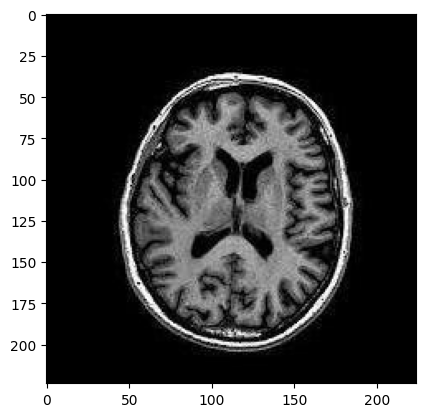

In [9]:
img_batch, label_batch = next(train_dataset)
img = img_batch[0] 
plt.imshow(img)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
image_size = (224, 224)
channels = 3
image_shape = (image_size[0], image_size[1], channels)
class_count = 4

model=Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 512)       │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,524,420 (24.89 MB)

 Trainable params: 6,524,420 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',mode='min',patience=7)

In [13]:
history= model.fit(train_dataset,validation_data=test_dataset,epochs=30,callbacks=[early_stopping])

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 114s 502ms/step - accuracy: 0.4675 - loss: 1.1147 - val_accuracy: 0.7674 - val_loss: 0.6149
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 291ms/step - accuracy: 0.7967 - loss: 0.5396 - val_accuracy: 0.7757 - val_loss: 0.5059
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 293ms/step - accuracy: 0.8507 - loss: 0.4105 - val_accuracy: 0.8474 - val_loss: 0.3760
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 296ms/step - accuracy: 0.8849 - loss: 0.3190 - val_accuracy: 0.8780 - val_loss: 0.3172
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.9064 - loss: 0.2640 - val_accuracy: 0.8787 - val_loss: 0.2840
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 294ms/step - accuracy: 0.9331 - loss: 0.1964 - val_accuracy: 0.9130 - val_loss: 0.2358
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 300ms/step - accuracy: 0.9413 - loss: 0.1779 - val_accuracy: 0.9207 - val_loss: 0.2061
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 294ms/step - accuracy: 0.9540 - loss: 

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9720 - loss: 0.1490
Test Accuracy: 0.9733


In [15]:
final_train_acc = history.history['accuracy'][-1] 
print(f"Final Training Accuracy: {final_train_acc:.4f}")

Final Training Accuracy: 0.9940


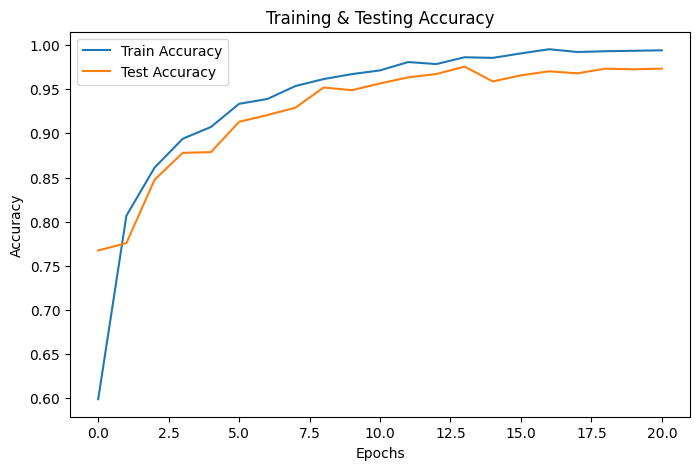

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Testing Accuracy")
plt.legend()
plt.show()